In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
def integrand(cos_theta):
    
    
    alpha = (1/137)
    
    #cos^2(theta/2)
    cos_theta2_square = (1+cos_theta)/2

    #sen^2(theta/2)
    sen_theta2_square = (1-cos_theta)/2

    termo1 = (1+cos_theta**2)/2
    termo2 = (1+(cos_theta2_square**2))/(sen_theta2_square**2)
    termo3 = -2*(cos_theta2_square**2)/sen_theta2_square
    coeff1 = alpha**2/(8)

    y1 = termo1+termo2+termo3
    y1 = 8*np.pi*coeff1*y1

    return y1*0.389389379372e9

In [3]:
cos_max = np.tanh(2.5)
energy = np.arange(0.1,15.1,0.01)
integral = sc.integrate.quad(integrand,-1,cos_max)
cross_sectionB = []
for e in energy:
    cross_sectionB.append(integral[0]/(e**2))
    


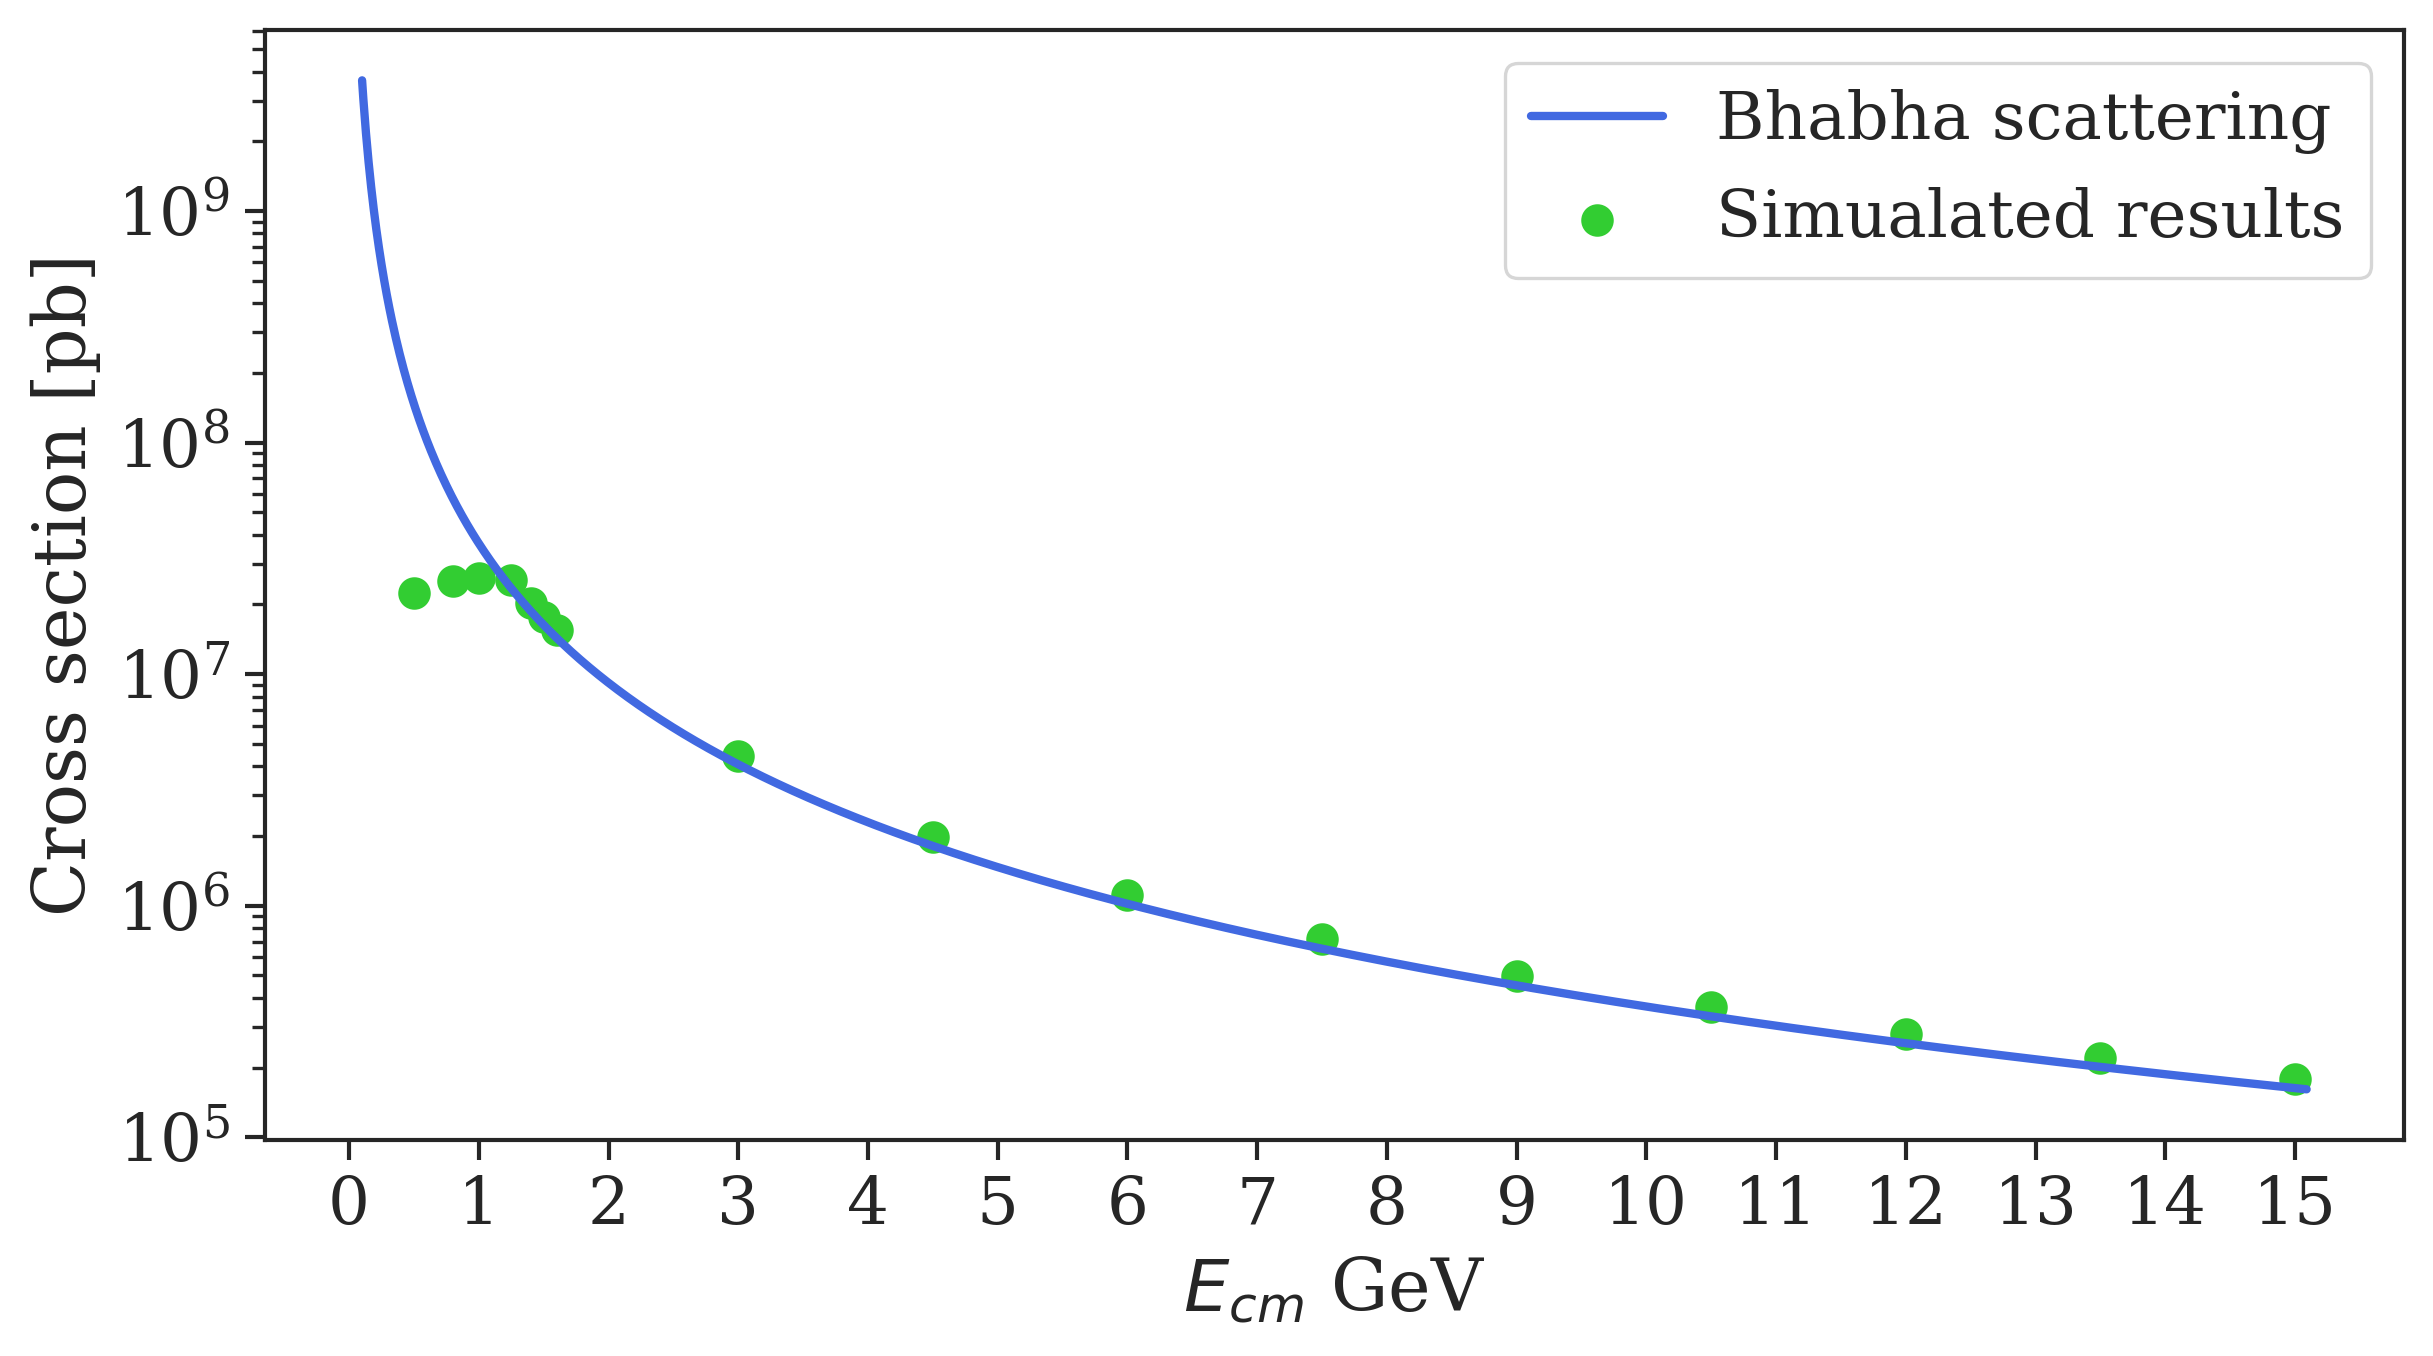

In [31]:
#cross_section = [2.597e+07,1.771e+07,  4.43e+06, 1.972e+06, 1.109e+06,7.132e+05, 4.956e+05,3.644e+05, 2.793e+05,2.203e+05,1.789e+05 ] pt cut of 3 GeV
cross_section = [2.247e+07,2.52e+07,2.597e+07,2.55e+07, 2.033e+07, 1.771e+07, 1.556e+07, 4.453e+06,1.985e+06, 1.117e+06, 7.155e+05, 4.967e+05, 3.648e+05, 2.797e+05,2.209e+05,1.79e+05]
E_GeV =[0.5,0.8,1,1.25,1.4,1.5,1.6,3,4.5,6,7.5,9,10.5,12,13.5,15]
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.plot(energy,cross_sectionB, color = 'royalblue', lw = 2, label = 'Bhabha scattering')
plt.scatter(E_GeV,cross_section, color = 'limegreen',linewidth = 3, label = 'Simualated results')
plt.ylabel('Cross section [pb]')
plt.xlabel(r'$E_{cm}$ GeV')
plt.yscale('log')
plt.legend()
plt.xticks(range(0,16))
plt.show()

In [32]:
diff = []
cos_max = np.tanh(2.5)
integral = sc.integrate.quad(integrand,-1,cos_max)
for i,e in enumerate(E_GeV):
    diff.append(-integral[0]/(e**2)+cross_section[i])

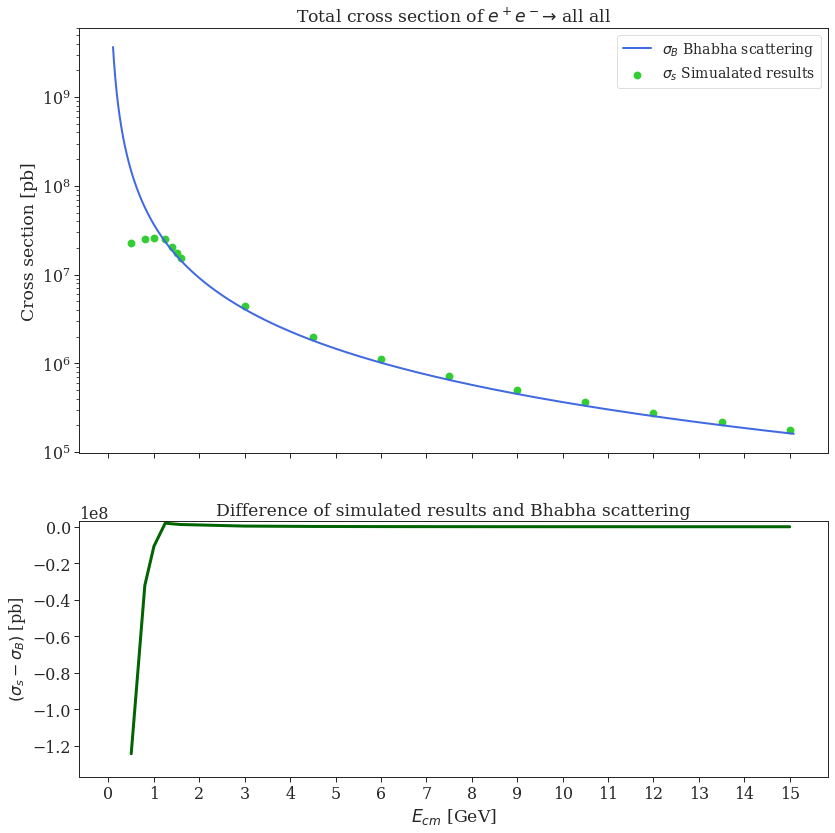

In [33]:
#Invariant mass for two process and the difference between them:

f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[5, 3]}, figsize = [13,13])
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.92, top=0.92, wspace=None, hspace=0.2)


#Plot Invariant mass
axarr[0].plot(energy,cross_sectionB, color = 'royalblue', lw = 2, label = r'$\sigma_{B}$ Bhabha scattering')
axarr[0].scatter(E_GeV,cross_section, color = 'limegreen',linewidth = 3, label = r'$\sigma_{s}$ Simualated results')
axarr[0].set_yscale('log')
axarr[0].set_ylabel('Cross section [pb]')
axarr[0].set_title(r'Total cross section of $e^+e^-\to$ all all')



#Plot Difference between invariant mass
axarr[1].plot(E_GeV,diff, color ='darkgreen', lw =3)
axarr[1].set_ylabel(r'$(\sigma_{s} - \sigma_{B})$ [pb]', fontsize = 16)
axarr[1].set_xlabel('$E_{cm}$ [GeV]')
axarr[1].set_ylim((int(1.1*np.trunc(min(diff))),int(np.trunc(1.5*max(diff)))))
axarr[1].set_title('Difference of simulated results and Bhabha scattering')
axarr[1].set_xticks(range(0,16))
axarr[0].legend(fontsize=14)


plt.savefig('CMSplusMad2.pdf', dpi = 300)
plt.show()

In [37]:
cross_section_epem = [2.093e+07, 2.438e+07, 2.539e+07, 2.506e+07, 1.997e+07, 1.745e+07]
e_cm = [0.5,0.8,1,1.25,1.4,1.5]



In [45]:
diff1 = []
cos_max = np.tanh(2.5)
integral = sc.integrate.quad(integrand,-1,cos_max)
cs_Bhabha = []
for i,e in enumerate(e_cm):
    cs_Bhabha.append(integral[0]/(e**2))
    diff1.append(-integral[0]/(e**2)+cross_section[i])

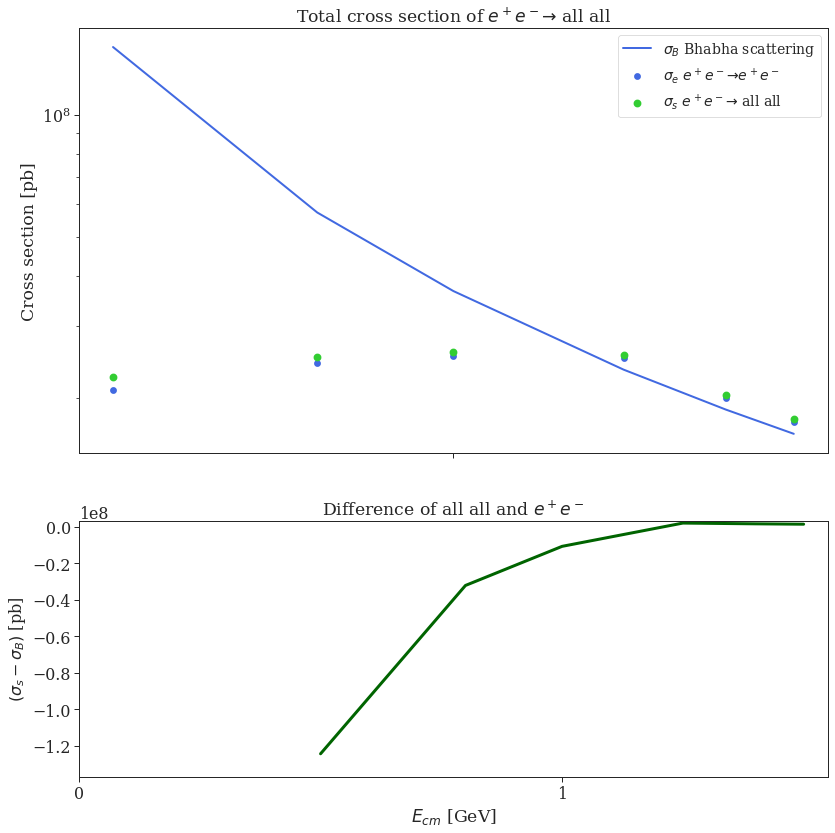

In [50]:
#Invariant mass for two process and the difference between them:

f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[5, 3]}, figsize = [13,13])
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.92, top=0.92, wspace=None, hspace=0.2)


#Plot Invariant mass
axarr[0].plot(e_cm,cs_Bhabha, color = 'royalblue', lw = 2, label = r'$\sigma_{B}$ Bhabha scattering')
axarr[0].scatter(e_cm,cross_section_epem, color = 'royalblue', lw = 2, label = r'$\sigma_{e}$ $e^+e^-\to e^+e^-$')
axarr[0].scatter(e_cm,cross_section[:6], color = 'limegreen',linewidth = 3, label = r'$\sigma_{s}$ $e^+e^-\to$ all all')
axarr[0].set_yscale('log')
axarr[0].set_ylabel('Cross section [pb]')
axarr[0].set_title(r'Total cross section of $e^+e^-\to$ all all')



#Plot Difference between invariant mass
axarr[1].plot(e_cm,diff1, color ='darkgreen', lw =3)
axarr[1].set_ylabel(r'$(\sigma_{s} - \sigma_{B})$ [pb]', fontsize = 16)
axarr[1].set_xlabel('$E_{cm}$ [GeV]')
axarr[1].set_ylim((int(1.1*np.trunc(min(diff))),int(np.trunc(1.5*max(diff)))))
axarr[1].set_title('Difference of all all and $e^+e^-$')
axarr[1].set_xticks(range(0,2))
axarr[0].legend(fontsize=14)


plt.savefig('CMSplusMad2.pdf', dpi = 300)
plt.show()

In [65]:
energy_Dict = {0.8:[2.534e+07+1.364e+05,0.001954,5.011e+05] ,1: [2.430e+07+2.11e+05,0.0005073,6.877e+05],1.25:[2.505e+07+8.676e+04,0.007587 ,3.579e+05],1.5: [6.14e+04+1.74e+07,0.02267,2.485e+05]}
labels = [r'$e^+e^-$',r'$\mu^+\mu^-$',r'$\gamma\gamma$']
legend = [r'$\sqrt{s} = 0.8$ GeV',r'$\sqrt{s} = 1$ GeV',r'$\sqrt{s} = 1.25 $ GeV',r'$\sqrt{s} = 1.5 $ GeV']
color = ['royalblue','tomato','slateblue','dimgrey','coral','teal']

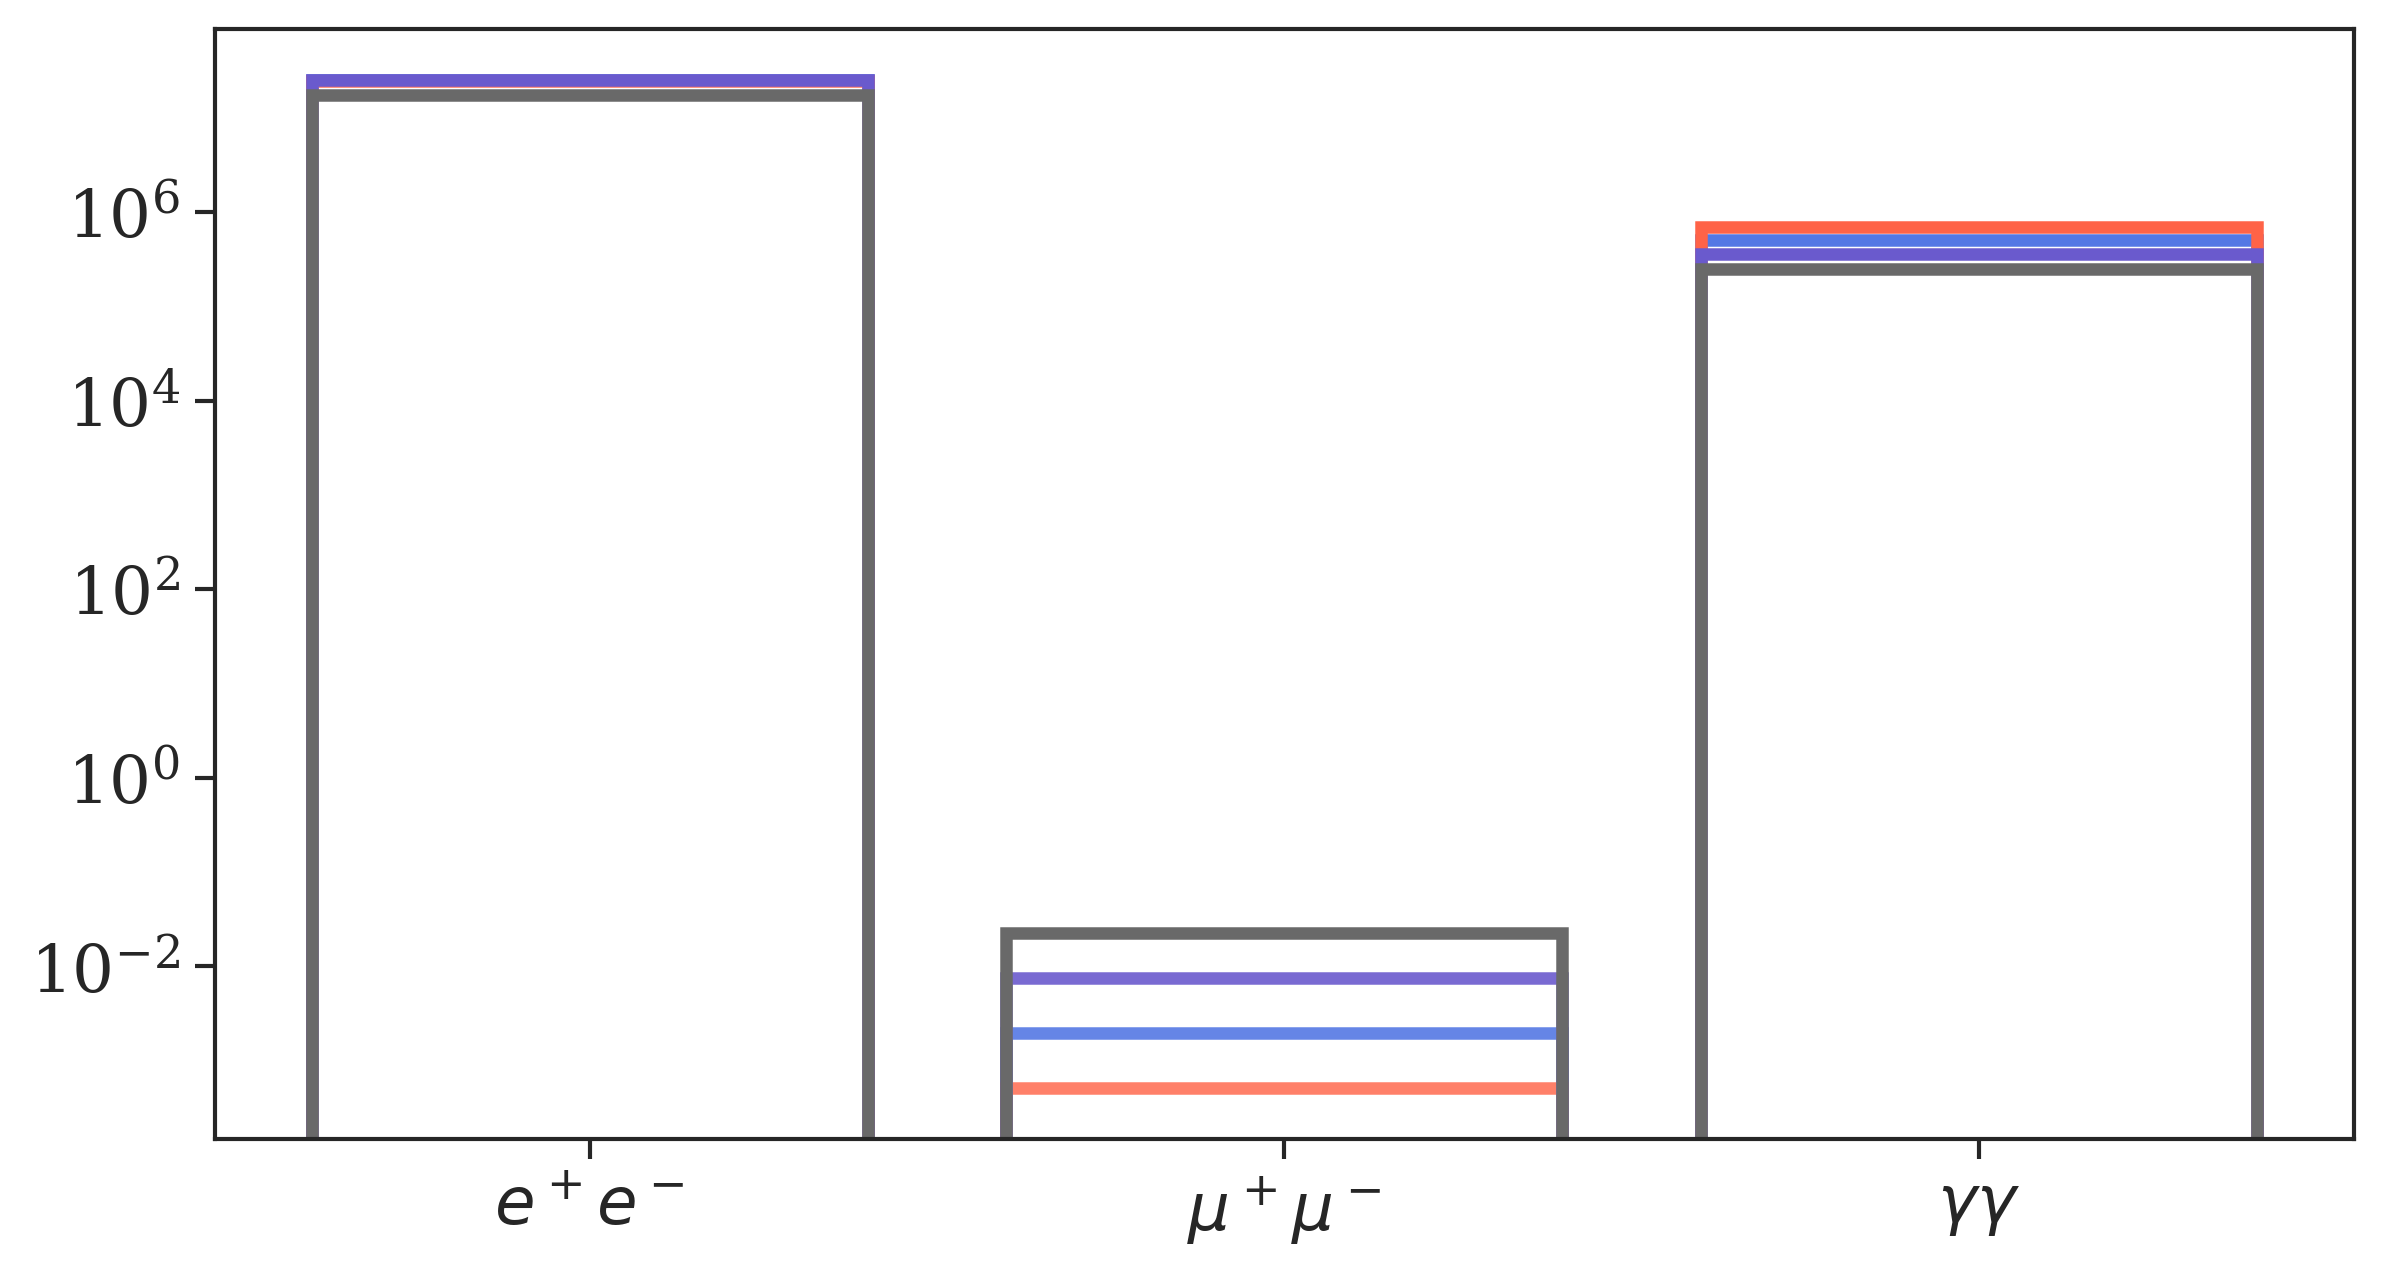

In [68]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
for i,eDict in enumerate(energy_Dict):
    plt.bar(labels, energy_Dict[eDict], edgecolor = color[i],color =(1,1,1,0.1), label = legend[i], lw =3)
    
plt.yscale('log')
plt.ylabel('Cross section [pb]')
plt.title(r'Cross section of the final state')

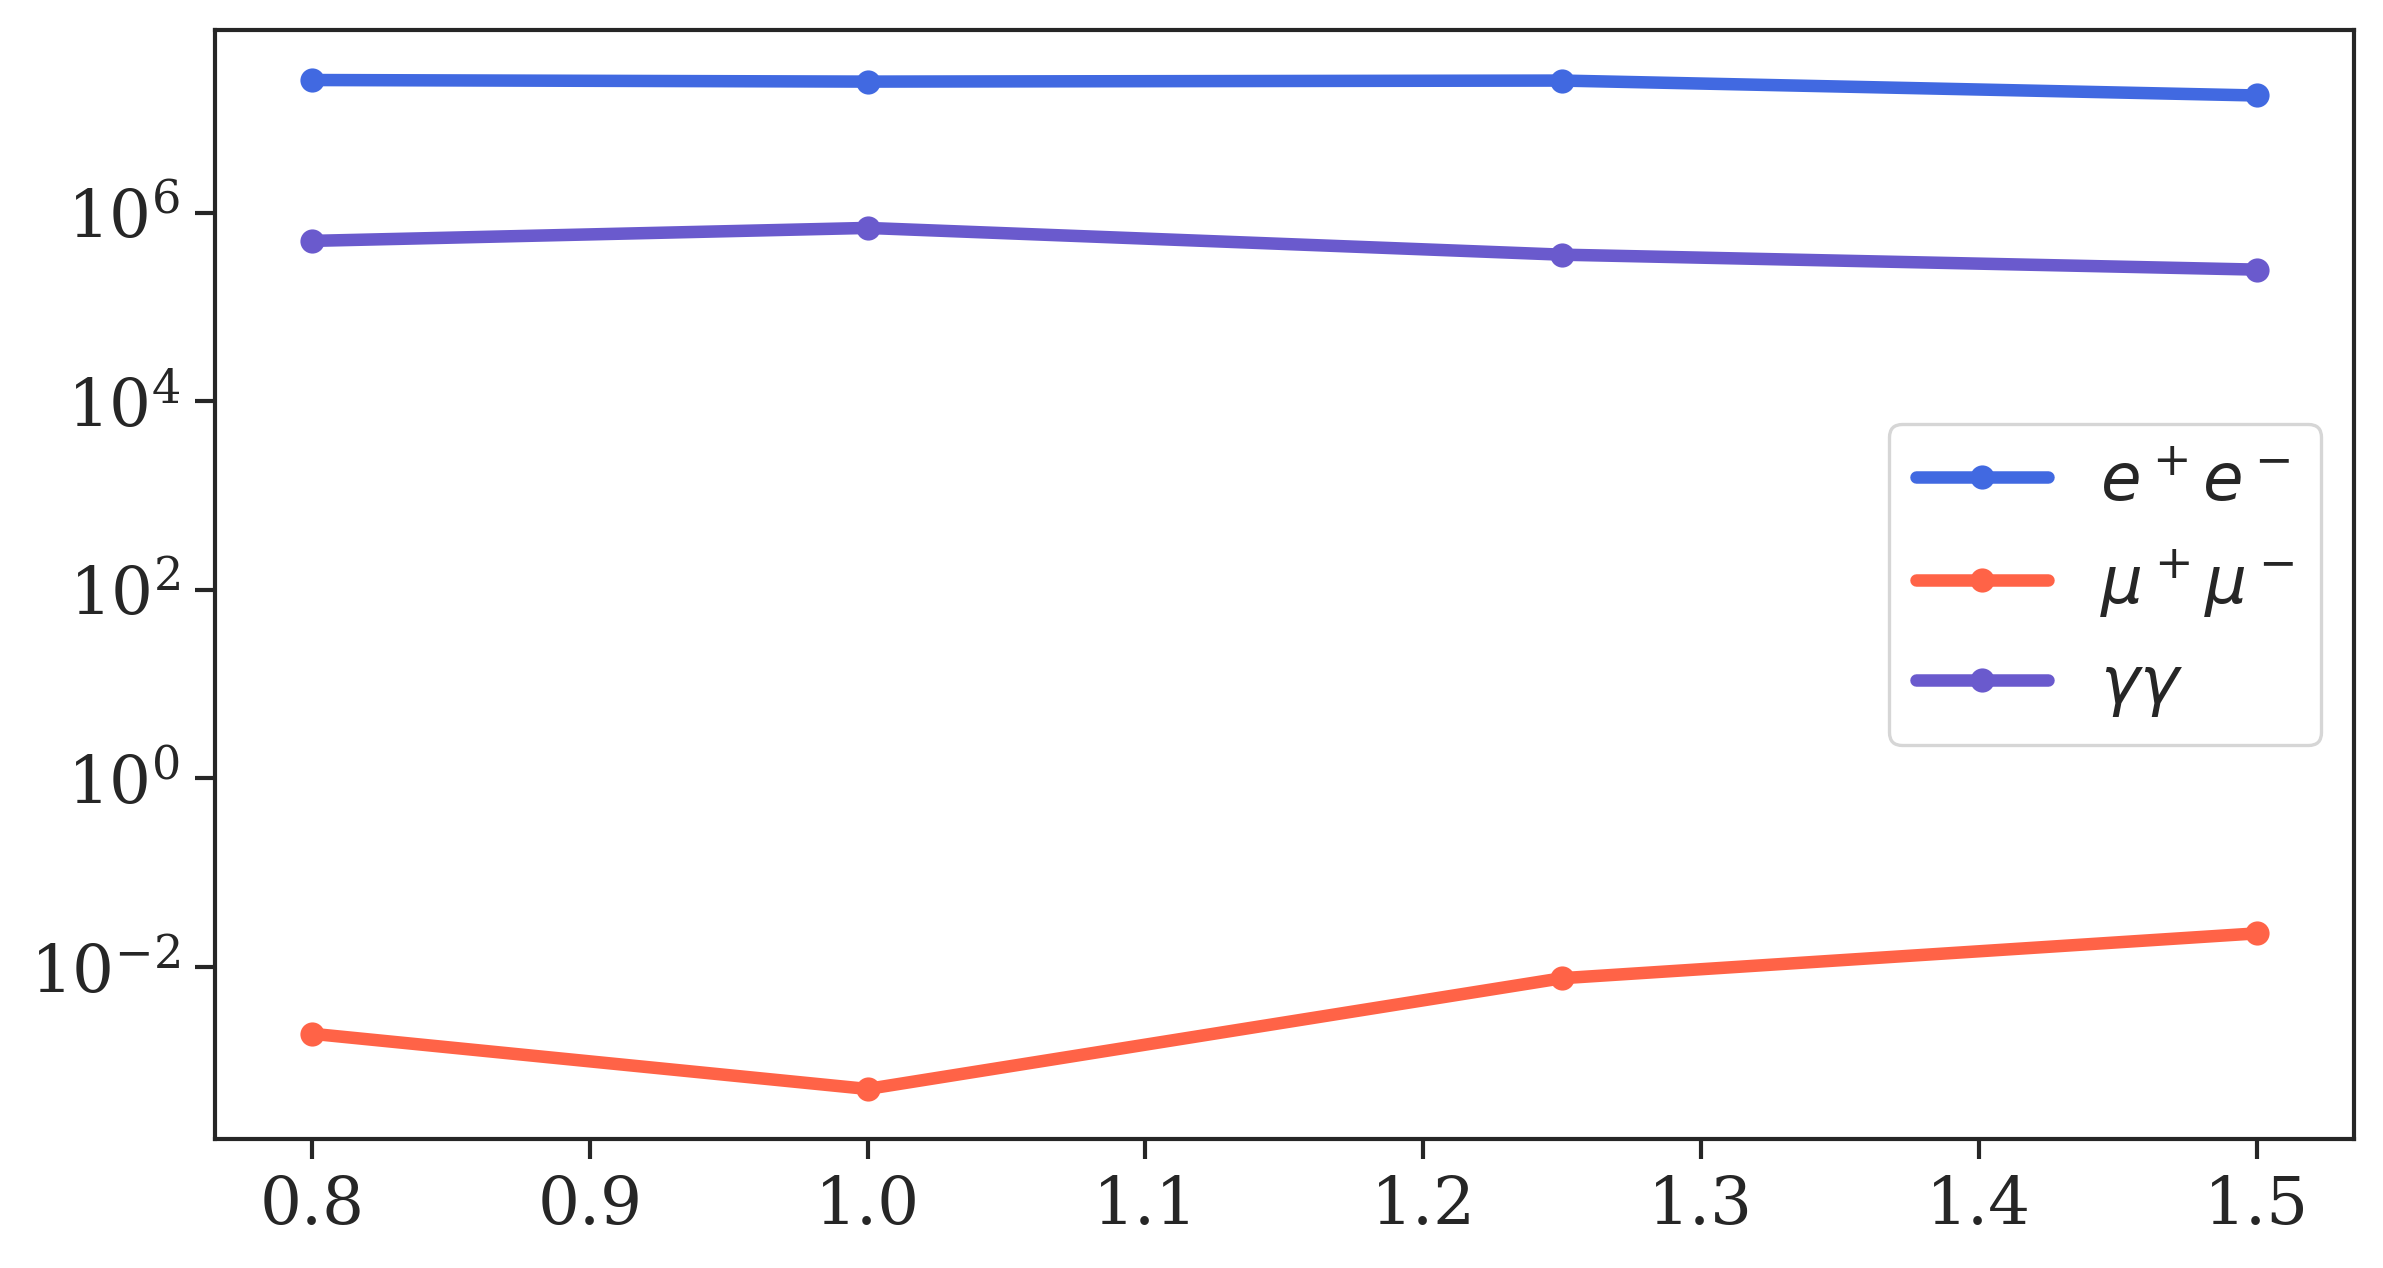

In [75]:
legenda = [r'$e^+e^-$',r'$\mu^+\mu^-$',r'$\gamma\gamma$']
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
for i in range(0,3):
    plt.plot([0.8,1,1.25,1.5], [energy_Dict[0.8][i], energy_Dict[1][i], energy_Dict[1.25][i], energy_Dict[1.5][i]] , color = color[i], lw =3, label = legenda[i], marker = 'o')
    
plt.yscale('log')
plt.legend()
plt.show()